In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

stock_data = yf.download('AAPL', start = '2024-01-01', end = '2024-08-01')

[*********************100%***********************]  1 of 1 completed


In [2]:
stock_data.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.081497,186.857993,182.346189,185.578815,82488700
2024-01-03,182.703186,184.319507,181.890063,182.673439,58414500
2024-01-04,180.382828,181.552914,179.361476,180.620803,71983600
2024-01-05,179.658936,181.225673,178.657420,180.462148,62379700
2024-01-08,184.002197,184.041870,179.976284,180.561327,59144500
2024-01-09,183.585709,183.595619,181.195937,182.375950,42841800
2024-01-10,184.626892,184.835121,182.375945,182.802343,46792900
2024-01-11,184.031921,185.479671,182.078459,184.973943,49128400


In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#Function for ADF testing
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic: ", result[0])
    print("p-value: ", result[1])
    for key, value in result[4].items():
        print("Critical value (%s): %.3f" % (key, value))


def kpss_test(series):
    result = kpss(series)
    print(f"ADF Statistic: ", result[0])
    print(f"p-value: ", result[1])
    for key, value in result[4].items():
        print("Critical value (%s): %.3f" % (key, value))

In [ ]:
prices = stock_data['Close']
adf_test(prices)

#p-value is way bigger than 0.05 therefore its non stationary data

ADF Statistic:  -0.16185773335458034
p-value:  0.9429179799860788
Critical value (1%): -3.476
Critical value (5%): -2.882
Critical value (10%): -2.578


In [12]:
prices

Ticker,AAPL
Date,
2024-01-02,184.081497
2024-01-03,182.703186
2024-01-04,180.382828
2024-01-05,179.658936
2024-01-08,184.002197
...,...
2024-07-25,216.232193
2024-07-26,216.699478
2024-07-29,216.977859


In [30]:
#Calculating 1st order DIFFERENCING
prices_diff = prices.diff()

In [13]:
#Calculating 2nd order DIFFERENCING

prices.diff().diff()

Ticker,AAPL
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,-0.942047
2024-01-05,1.596466
2024-01-08,5.067154
...,...
2024-07-25,5.388657
2024-07-26,1.511215
2024-07-29,-0.188904


In [ ]:
#TRANSFORMATION METHOD
import numpy as np
from scipy import stats

#Log transformation
prices_log = np.log(prices)

#Square root transformation
prices_square = np.sqrt(prices)

#Box-Cox transformation
#Box cox should be strictly positive
prices_boxcox, lam = stats.boxcox(prices[prices > 0].to_numpy().ravel()) #Squeezing to 1D array



In [28]:
adf_test(prices_boxcox)
#Even after boxcox, the p value is greater than 0.05 therefore its still non stationary

ADF Statistic:  -0.5742982465297487
p-value:  0.8766844583392759
Critical value (1%): -3.476
Critical value (5%): -2.882
Critical value (10%): -2.578


In [ ]:
adf_test(prices_diff.dropna())
#With 1st order differencing, the p-value is less than 0.05, so it works

ADF Statistic:  -11.022790369386984
p-value:  5.929643944389814e-20
Critical value (1%): -3.477
Critical value (5%): -2.882
Critical value (10%): -2.578


In [33]:
5.929643944389814e-20<0.05

True

In [43]:
#DE-TRENDING METHOD
#Using Linear Trend

from scipy import signal

trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendLine = np.polyval(trend, np.arange(len(prices)))
prices_detrended_LT = signal.detrend(prices.values)


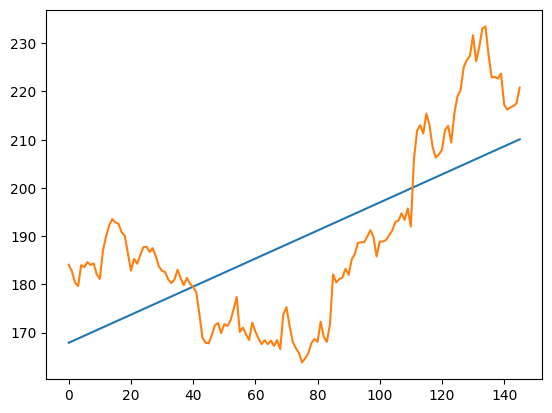

In [49]:
plt.plot(np.arange(len(prices)), trendLine)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [44]:
adf_test(prices_detrended_LT)

ADF Statistic:  -2.3465873849898826
p-value:  0.1573823334678125
Critical value (1%): -3.478
Critical value (5%): -2.883
Critical value (10%): -2.578


In [47]:
#Moving Average

window = 12
prices_ma = prices.rolling(window=window).mean()
prices_detrended = prices - prices_ma
prices_detrended_MA = prices_detrended.dropna()


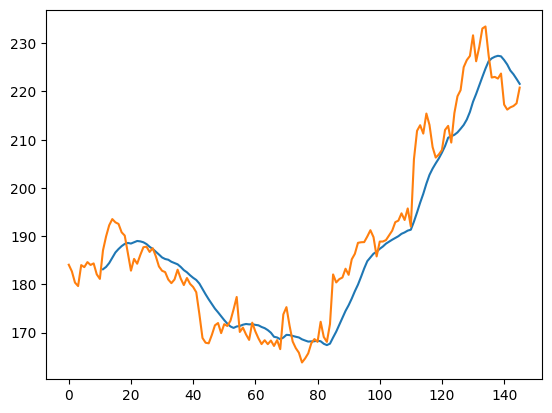

In [50]:
plt.plot(np.arange(len(prices)), prices_ma)
plt.plot(np.arange(len(prices)), prices)
plt.show()

In [48]:
adf_test(prices_detrended_MA)

ADF Statistic:  -2.8850244390553916
p-value:  0.04711737158016378
Critical value (1%): -3.480
Critical value (5%): -2.883
Critical value (10%): -2.578
